In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.lib.display import VimeoVideo
VimeoVideo('140084450')

In [3]:
from pylab import *
%matplotlib
rcParams['figure.figsize']=(12,3)                # Change the default figure size

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [4]:
from HH_functions import HH

ModuleNotFoundError: No module named 'HH_functions'

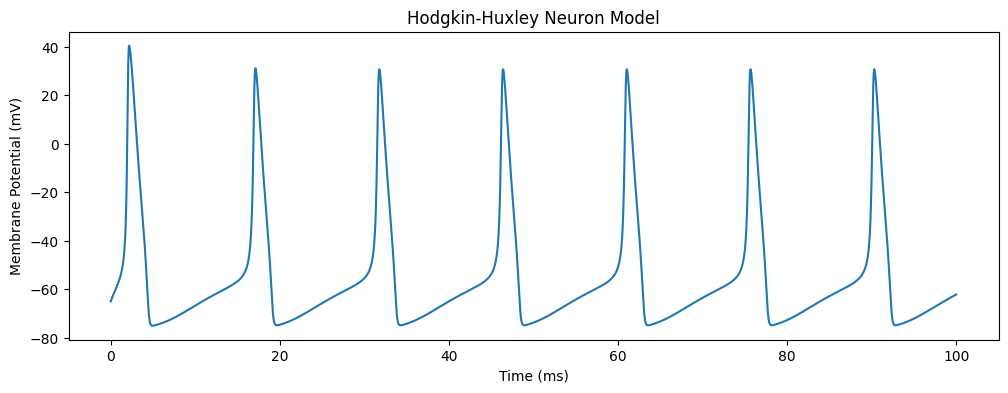

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
C_m = 1.0    # membrane capacitance (uF/cm^2)
g_Na = 120.0 # sodium conductance
g_K = 36   # potassium conductance
g_L = 0.3    # leak conductance
E_Na = 50.0  # sodium reversal potential (mV)
E_K = -77.0  # potassium reversal potential
E_L = -54.4  # leak reversal potential

# Gate equations
def alpha_m(V): return 0.1*(V+40)/(1-np.exp(-(V+40)/10))
def beta_m(V):  return 4*np.exp(-(V+65)/18)
def alpha_h(V): return 0.07*np.exp(-(V+65)/20)
def beta_h(V):  return 1/(1+np.exp(-(V+35)/10))
def alpha_n(V): return 0.01*(V+55)/(1-np.exp(-(V+55)/10))
def beta_n(V):  return 0.125*np.exp(-(V+65)/80)

# Simulation
dt = 0.01
t = np.arange(0, 100, dt)
V = np.zeros(len(t))
m = np.zeros(len(t))
h = np.zeros(len(t))
n = np.zeros(len(t))

# Initial conditions
V[0] = -65
m[0] = 0.05
h[0] = 0.6
n[0] = 0.32

# Input current
I_ext = 10  # try changing this value

# Main simulation loop
for i in range(1, len(t)):
    I_Na = g_Na * m[i-1]**3 * h[i-1] * (V[i-1] - E_Na)
    I_K  = g_K  * n[i-1]**4 * (V[i-1] - E_K)
    I_L  = g_L  * (V[i-1] - E_L)
    
    V[i] = V[i-1] + dt/C_m * (I_ext - I_Na - I_K - I_L)
    m[i] = m[i-1] + dt*(alpha_m(V[i-1])*(1-m[i-1]) - beta_m(V[i-1])*m[i-1])
    h[i] = h[i-1] + dt*(alpha_h(V[i-1])*(1-h[i-1]) - beta_h(V[i-1])*h[i-1])
    n[i] = n[i-1] + dt*(alpha_n(V[i-1])*(1-n[i-1]) - beta_n(V[i-1])*n[i-1])

# Plot
plt.figure(figsize=(12,4))
plt.plot(t, V)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Hodgkin-Huxley Neuron Model')
plt.show()